In [12]:
%load_ext autoreload
%autoreload 2
from evaluate_numeral_context_new import Evaluator
import pickle
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
# filtered_dataset = pickle.load(open('build/data_filtered_1B.test.pkl','rb'))
filtered_dataset = pickle.load(open('../../data/numeral_context/build/data_filtered_1Bnotable.test.rand.pkl','rb'))
nc = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/nc.dat','rb'))
idx2word = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/idx2word.dat','rb'))
wc = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/wc.dat','rb'))
word2idx = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/word2idx.dat','rb'))

In [44]:
e1 = Evaluator(
    filtered_dataset,
    wc,
    nc,
    idx2word,
    word2idx
)

length of dataset: 1400 
dataset examples: 
 [('1.96', ['the', 'average', 'household', 'size', 'was', 'and', 'the', 'average', 'family', 'size']), ('1813.0', ['and', 'was', 'sold', 'there', 'in', 'dutch', 'career', 'and', 'capture', 'wilhelmina']), ('1111.0', ['of', 'blois', 'bishop', 'of', 'winchester', 'november', 'baldwin', 'iv', 'count', 'of']), ('1837.0', ['electromagnetic', 'telegraph', 'in', 'göttingen', 'may', 'samuel', 'morse', 'patents', 'the', 'telegraph']), ('20.1', ['made', 'up', 'of', 'individuals', 'and', 'were', 'someone', 'living', 'alone', 'who'])] 
numeral examples : [1.9600000e+00 1.8130000e+03 1.1110000e+03 1.8370000e+03 2.0100000e+01
 1.5600000e-02 2.5648400e+05 2.6600000e+00 4.9540000e+03 2.0080116e+07] 
 


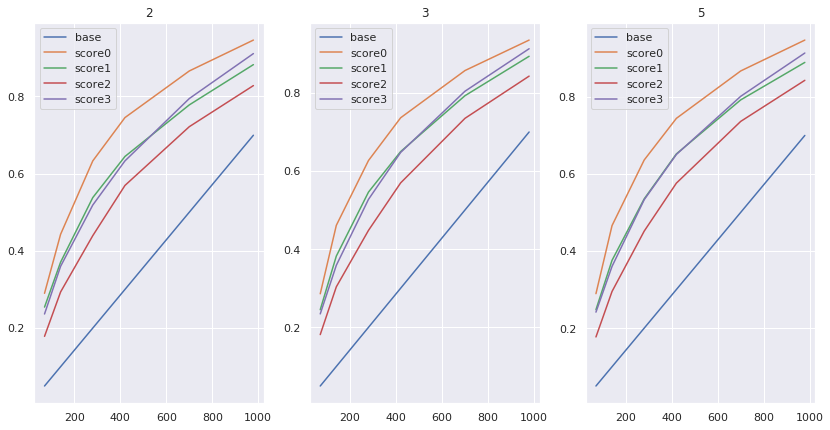

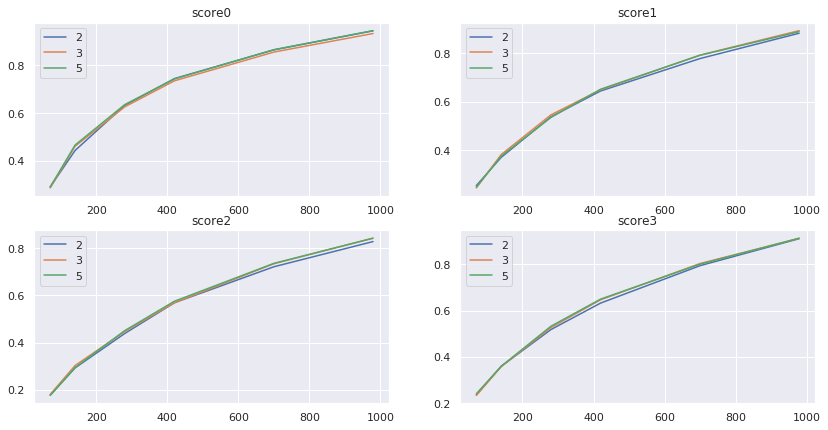

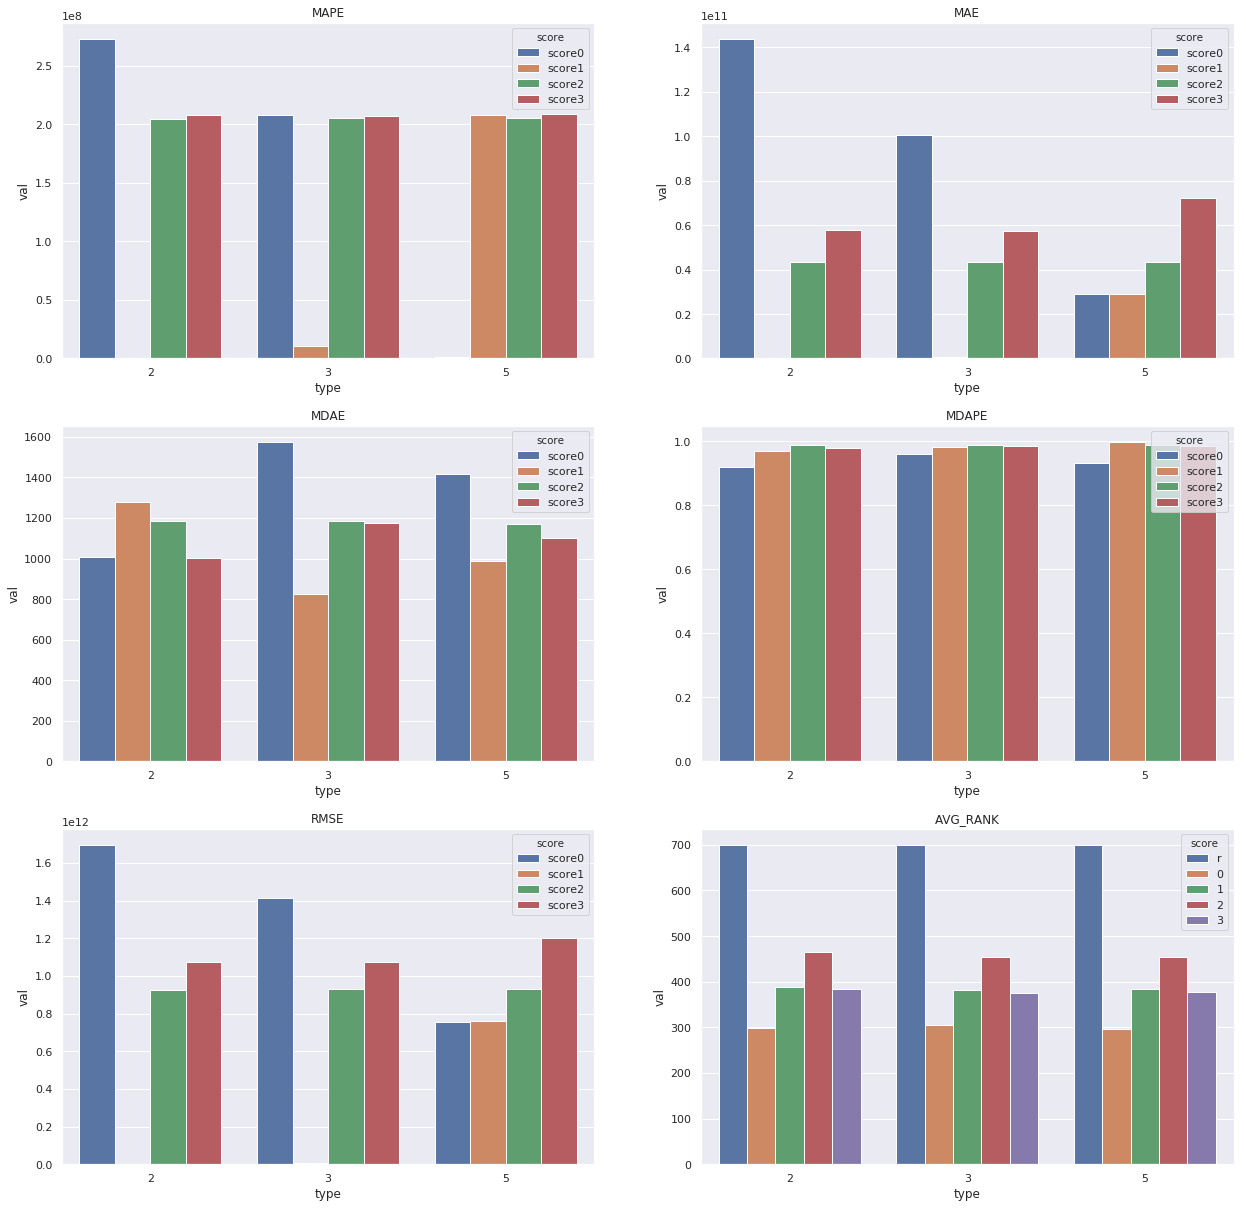

In [46]:
prototype_size = ['2', '3', '5']

res_sz = {}
for sz in prototype_size:
    
    idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B30W/prototypes/{}-0005/idx2vec_o_epoch1.dat'.format(sz),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B30W/prototypes/{}-0005/idx2vec_i_epoch1.dat'.format(sz),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/1B30W/prototypes/{}-0005/trained_prototypes_epoch1_{}00_1.0.dat'.format(sz, sz),'rb'))
    
    e1.load_prototype(idx2vec_i, idx2vec_o, trained_prototypes)
    res_sz[sz] = e1.eval_all(varbose=False)
    
e1.draw(res_sz)

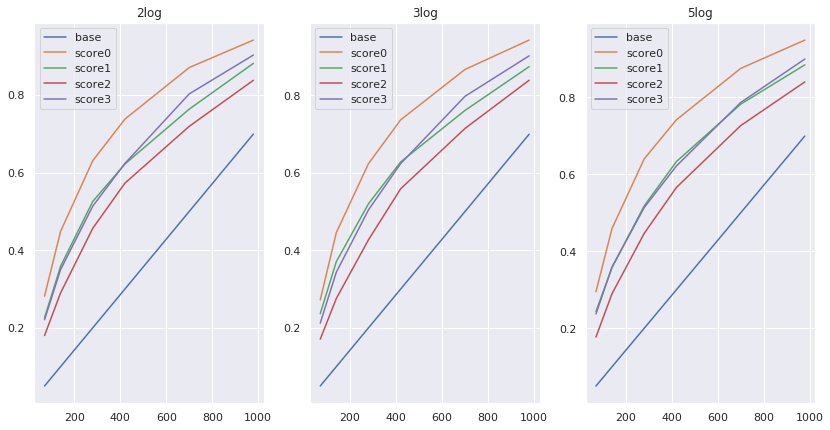

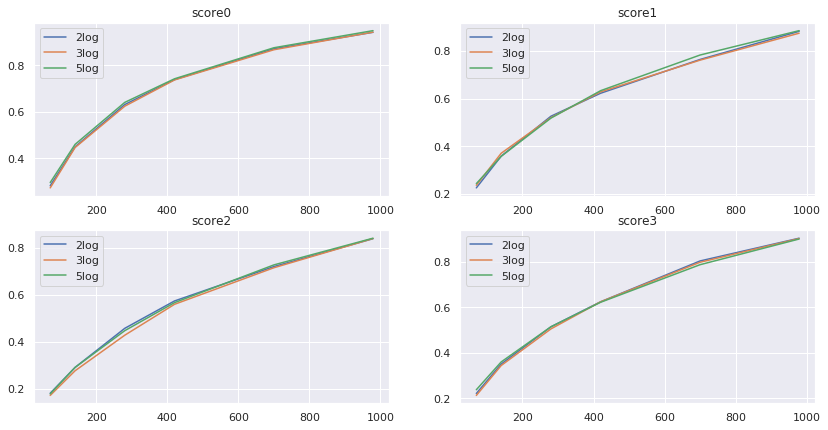

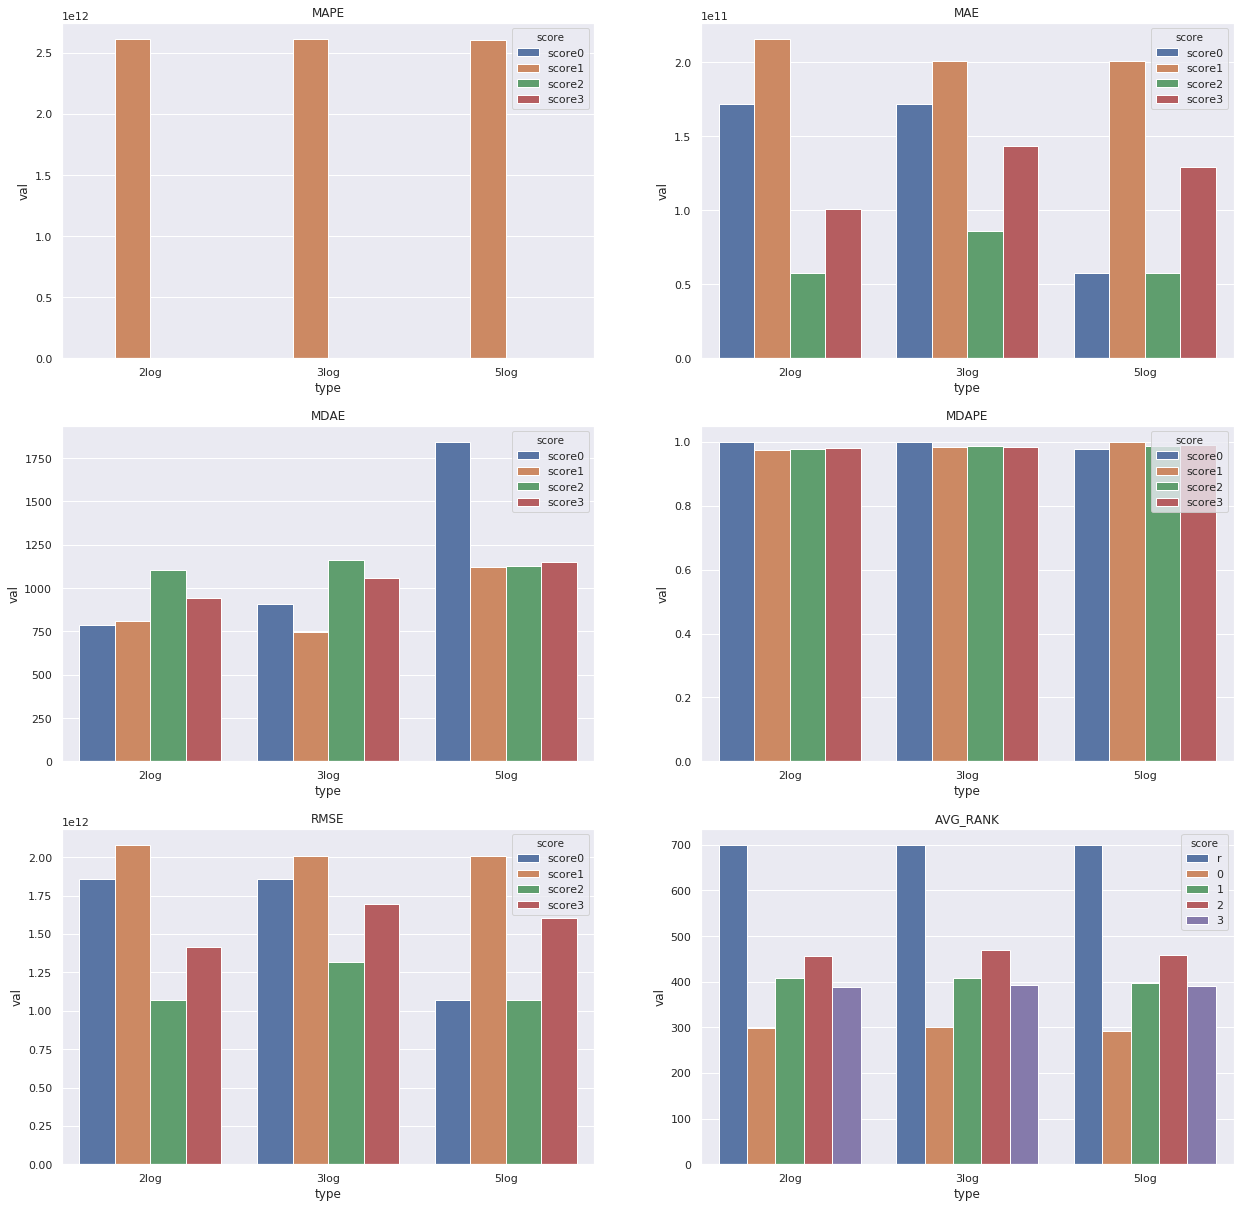

In [47]:
prototype_size = ['2', '3', '5']

res_sz_log = {}
for sz in prototype_size:
    
    idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B30W/prototypes_log/{}-0005/idx2vec_o_epoch1.dat'.format(sz),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B30W/prototypes_log/{}-0005/idx2vec_i_epoch1.dat'.format(sz),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/1B30W/prototypes_log/{}-0005/trained_prototypes_epoch1_{}00_1.0.dat'.format(sz, sz),'rb'))
    
    e1.load_prototype(idx2vec_i, idx2vec_o, trained_prototypes, log_space=True)
    res_sz_log[sz+'log'] = e1.eval_all(varbose=False)
    
e1.draw(res_sz_log)

In [48]:
e1.flod_score(res_sz, 0)

,RMSE,avg_rank,mae,mape,mdae,mdape,topk,x
2,1.69798e+12,298.5,1.43935e+11,2.73158e+08,1006.48,0.919007,"[0.29, 0.44285714285714284, 0.6328571428571429...","[70, 140, 280, 420, 700, 979]"
3,1.41641e+12,304.524,1.00706e+11,2.08006e+08,1576.6,0.959507,"[0.2857142857142857, 0.4607142857142857, 0.626...","[70, 140, 280, 420, 700, 979]"
5,7.5712e+11,296.614,2.91608e+10,1.38585e+06,1418.55,0.931625,"[0.2892857142857143, 0.4657142857142857, 0.635...","[70, 140, 280, 420, 700, 979]"


In [49]:
e1.flod_score(res_sz_log, 0)

,RMSE,avg_rank,mae,mape,mdae,mdape,topk,x
2log,1.86017e+12,298.064,1.72236e+11,2.60449e+07,787.4,1.00049,"[0.2814285714285714, 0.44857142857142857, 0.63...","[70, 140, 280, 420, 700, 979]"
3log,1.86019e+12,300.892,1.7224e+11,1.56135e+07,909.45,1.00007,"[0.27214285714285713, 0.44571428571428573, 0.6...","[70, 140, 280, 420, 700, 979]"
5log,1.07071e+12,292.477,5.77737e+10,2.04742e+08,1845.5,0.976907,"[0.295, 0.4592857142857143, 0.64, 0.7414285714...","[70, 140, 280, 420, 700, 979]"


In [45]:
idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B30W/LSTM/idx2vec_o_epoch1.dat','rb'))
idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B30W/LSTM/idx2vec_i_epoch1.dat','rb'))
LSTM_model_path = '../../data/wikipedia/save/1B30W/LSTM/sgns_epoch1.pt'
e1.load_LSTM(idx2vec_i, idx2vec_o, LSTM_model_path)
res_LSTM = e1.eval_all()
print(res_LSTM)

{'x': [70, 140, 280, 420, 700, 979], 'topk': array([[0.05      , 0.1       , 0.2       , 0.3       , 0.5       ,
        0.69928571],
       [0.045     , 0.09071429, 0.19      , 0.29214286, 0.505     ,
        0.735     ],
       [0.04571429, 0.11071429, 0.20142857, 0.30285714, 0.52142857,
        0.72214286],
       [0.06714286, 0.13      , 0.23071429, 0.315     , 0.51142857,
        0.71642857],
       [0.05785714, 0.10071429, 0.195     , 0.30357143, 0.53285714,
        0.72428571]]), 'RMSE': array([1.86019223e+12, 4.39848324e+12, 1.86019223e+12, 2.40243805e+12]), 'mape': array([1.16051027e+07, 4.95260009e+10, 2.35214297e+06, 3.08906749e+10]), 'mae': array([1.72252180e+11, 9.62249005e+11, 1.72238025e+11, 2.87170038e+11]), 'mdae': array([ 1804.785  ,  4232.31975, 42700.     ,  2672.92   ]), 'mdape': array([0.99876704, 0.99948033, 7.96697875, 0.99930457]), 'avg_rank': [700.5, 685.5128571428571, 685.4685714285714, 679.3535714285714, 680.9057142857143]}


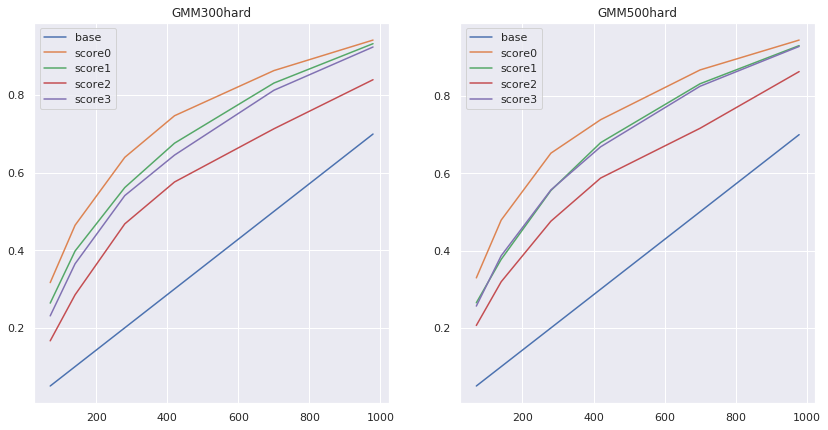

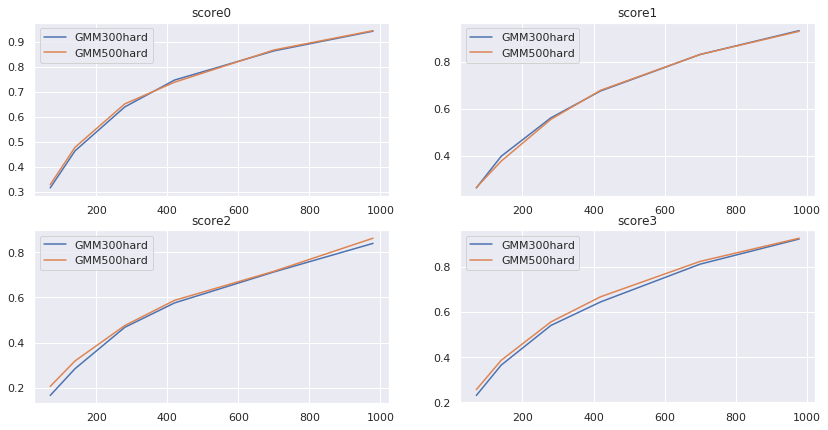

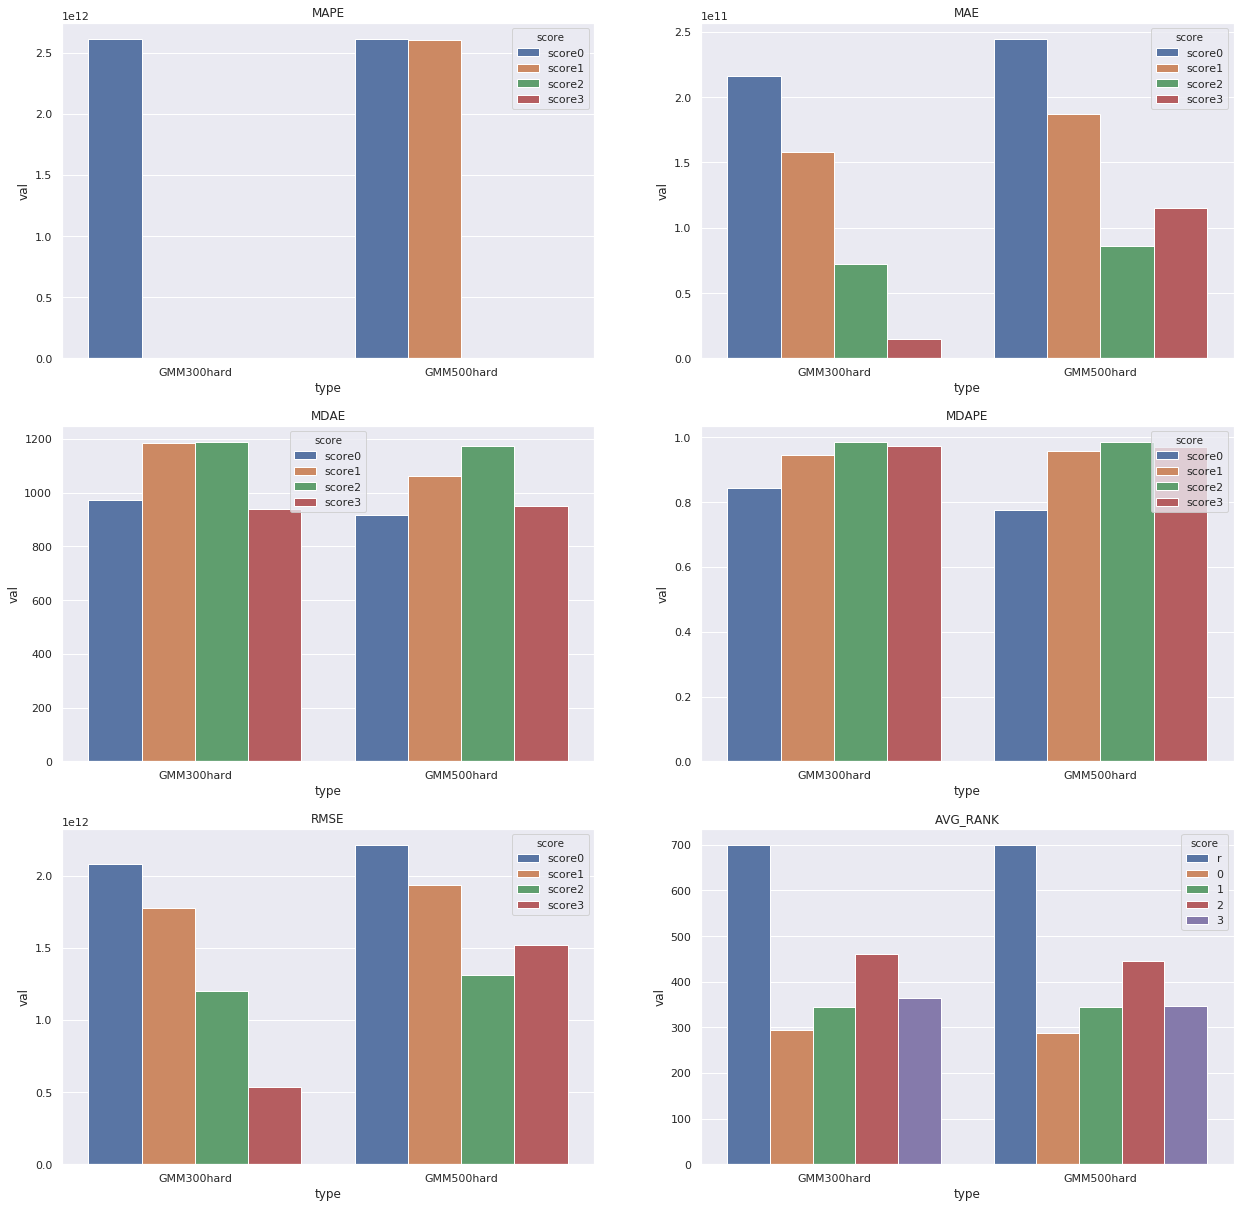

In [50]:
gmms = ['300', '500']
res_gmm = {}

for gmm_name in gmms:

    idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B30W/gmms/gmm-{}-rd-hard/idx2vec_o_epoch1.dat'.format(gmm_name),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B30W/gmms/gmm-{}-rd-hard/idx2vec_i_epoch1.dat'.format(gmm_name),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/1B30W/gmms/gmm-{}-rd-hard/trained_gmms_epoch1_{}.dat'.format(gmm_name, gmm_name),'rb'))
    gmm = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/gmm/gmm-{}-rd-hard.dat'.format(gmm_name),'rb'))

    e1.load_GMM(idx2vec_i, idx2vec_o, trained_prototypes, gmm)
    res_gmm['GMM'+gmm_name+'hard'] = e1.eval_all()

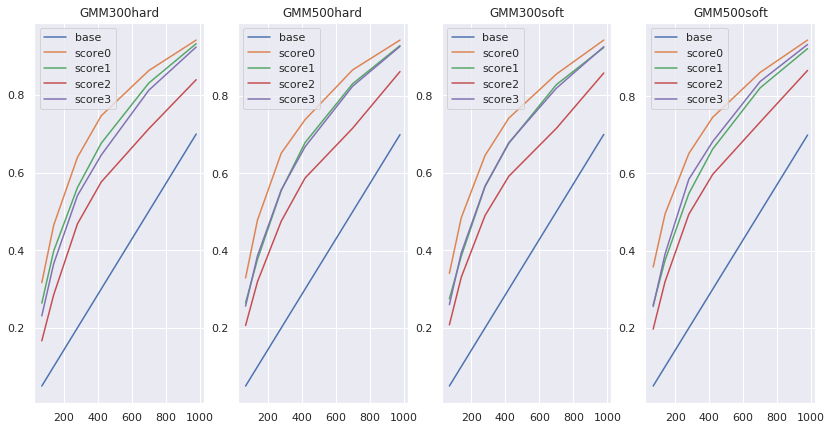

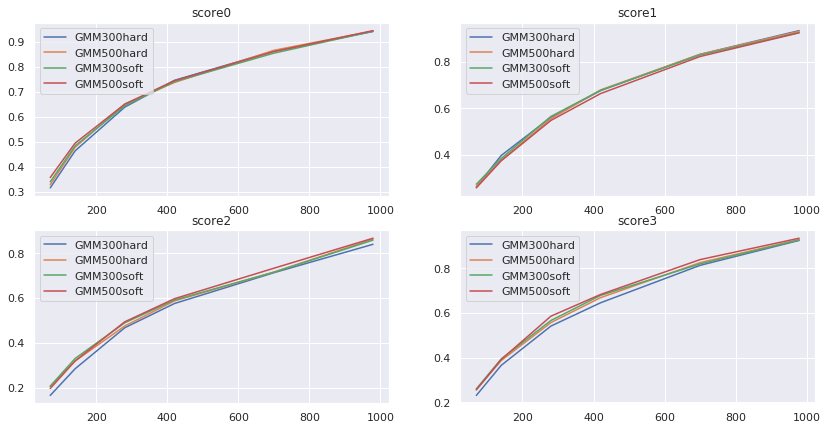

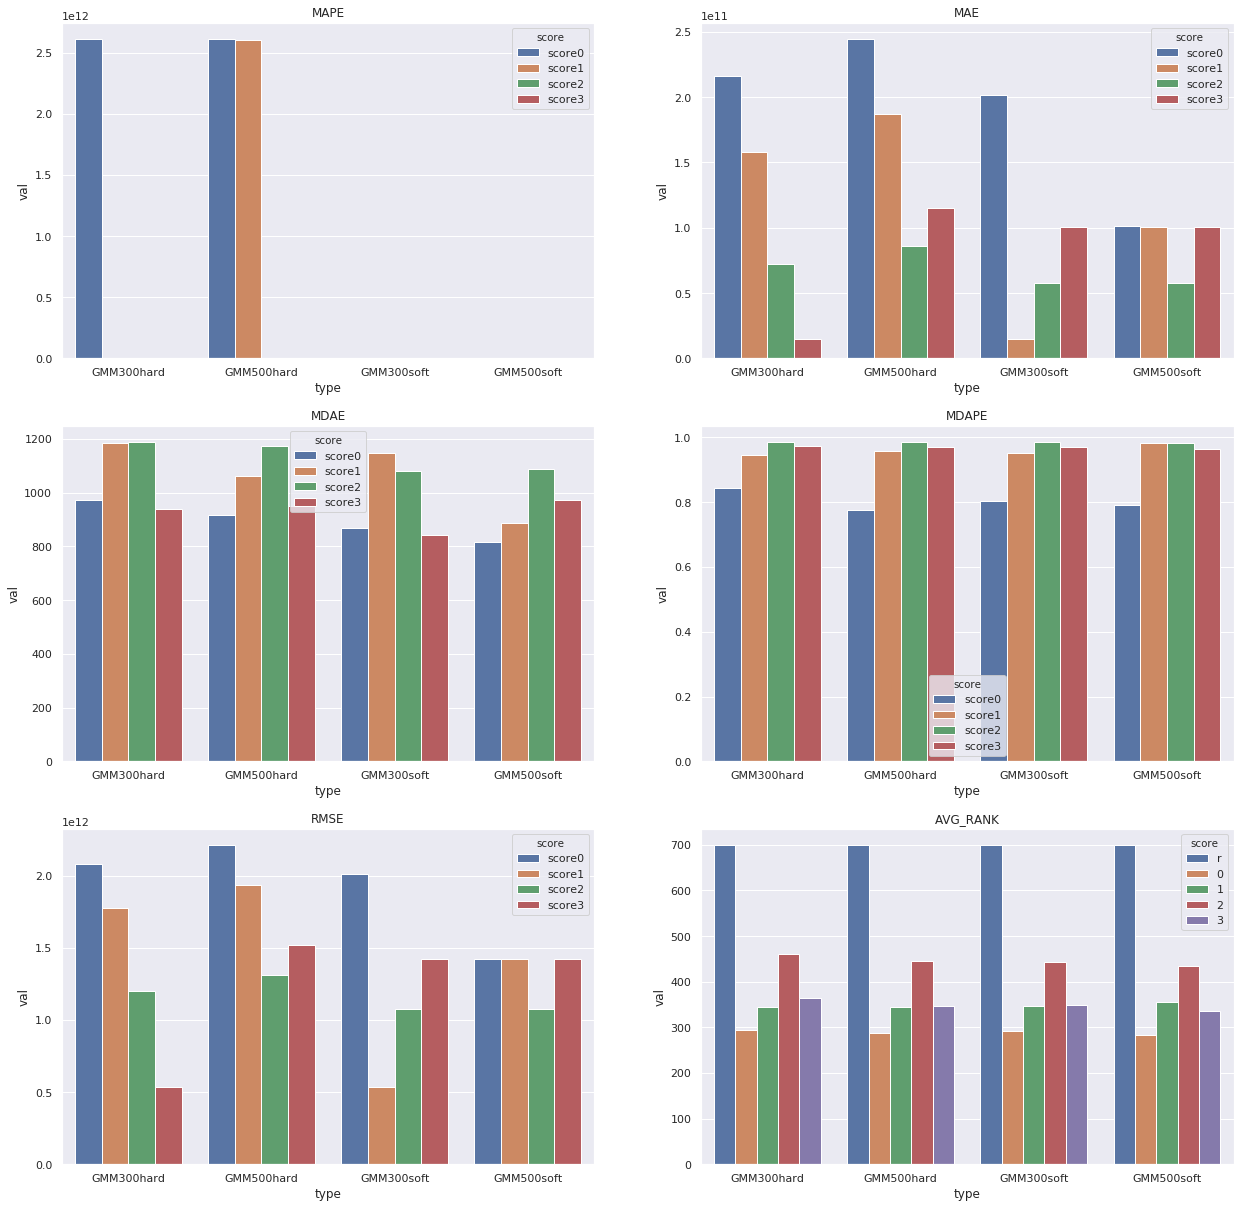

In [51]:
gmms = ['300', '500']

for gmm_name in gmms:

    idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B30W/gmms/gmm-{}-rd-soft/idx2vec_o_epoch1.dat'.format(gmm_name),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B30W/gmms/gmm-{}-rd-soft/idx2vec_i_epoch1.dat'.format(gmm_name),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/1B30W/gmms/gmm-{}-rd-soft/trained_gmms_epoch1_{}.dat'.format(gmm_name, gmm_name),'rb'))
    gmm = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/gmm/gmm-{}-rd-soft.dat'.format(gmm_name),'rb'))

    e1.load_GMM(idx2vec_i, idx2vec_o, trained_prototypes, gmm)
    res_gmm['GMM'+gmm_name+'soft'] = e1.eval_all()

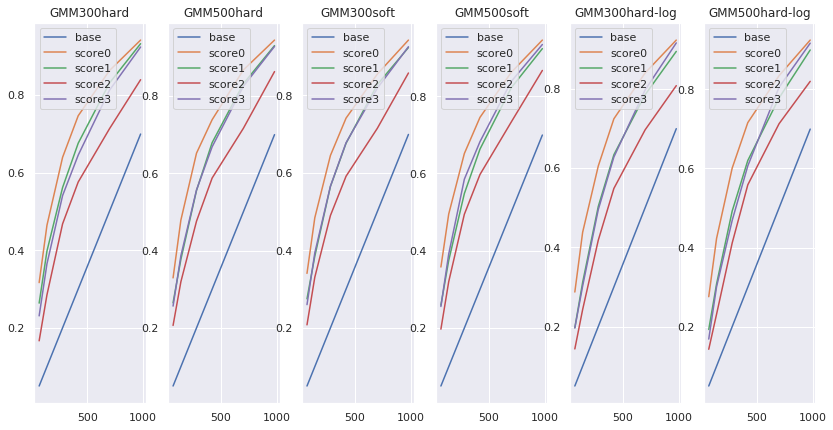

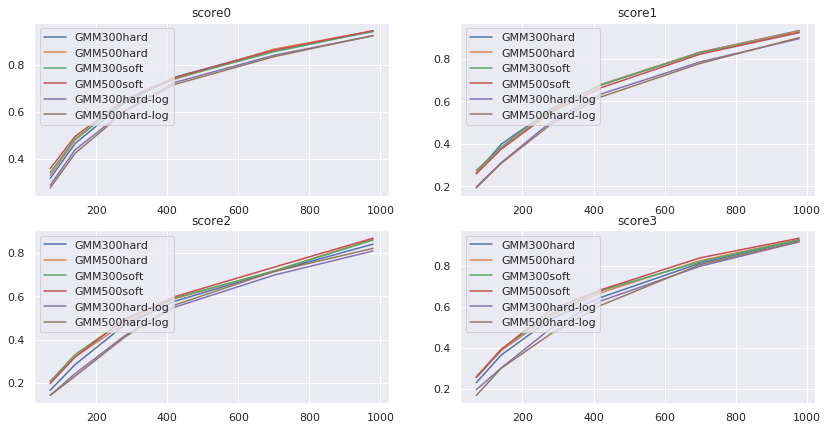

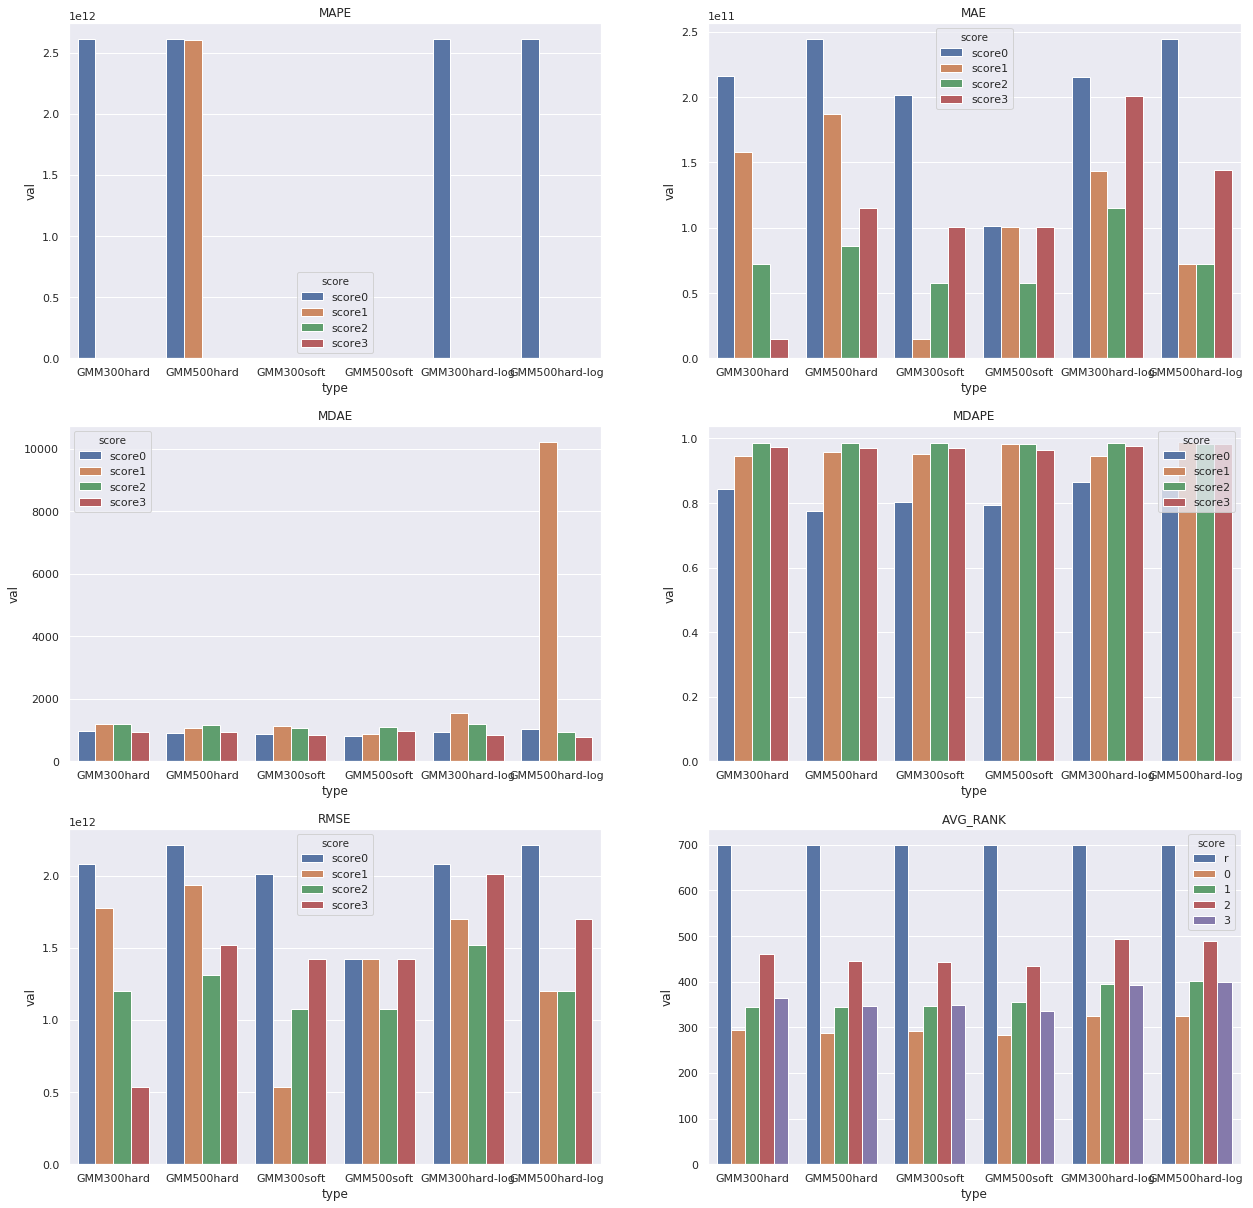

In [54]:
for gmm_name in gmms:

    idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B30W/gmms_log/gmm-{}-rd-hard/idx2vec_o_epoch1.dat'.format(gmm_name),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B30W/gmms_log/gmm-{}-rd-hard/idx2vec_i_epoch1.dat'.format(gmm_name),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/1B30W/gmms_log/gmm-{}-rd-hard/trained_gmms_epoch1_{}.dat'.format(gmm_name, gmm_name),'rb'))
    gmm = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/gmm_log/gmm-{}-rd-hard.dat'.format(gmm_name),'rb'))

    e1.load_GMM(idx2vec_i, idx2vec_o, trained_prototypes, gmm, log_space=True)
    res_gmm['GMM'+gmm_name+'hard-log'] = e1.eval_all()
    

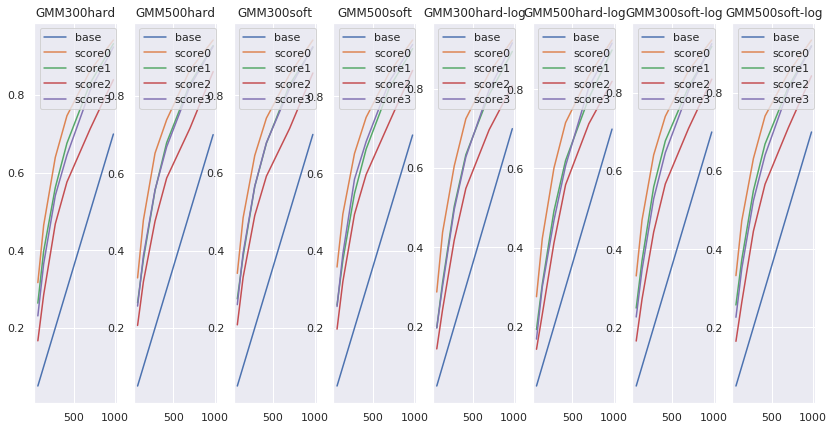

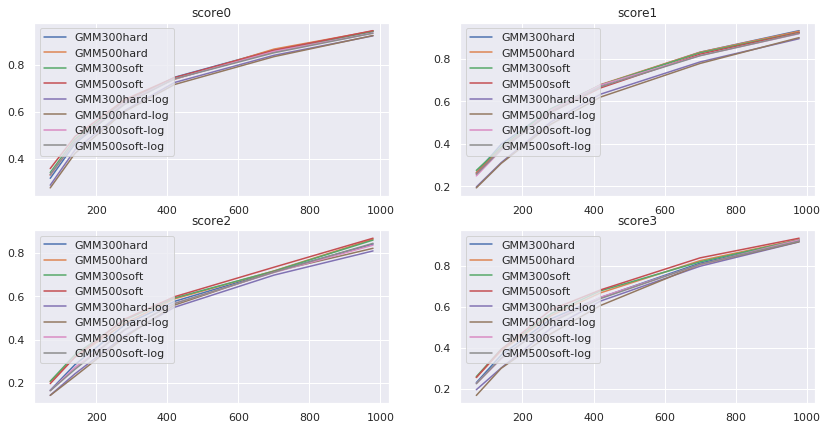

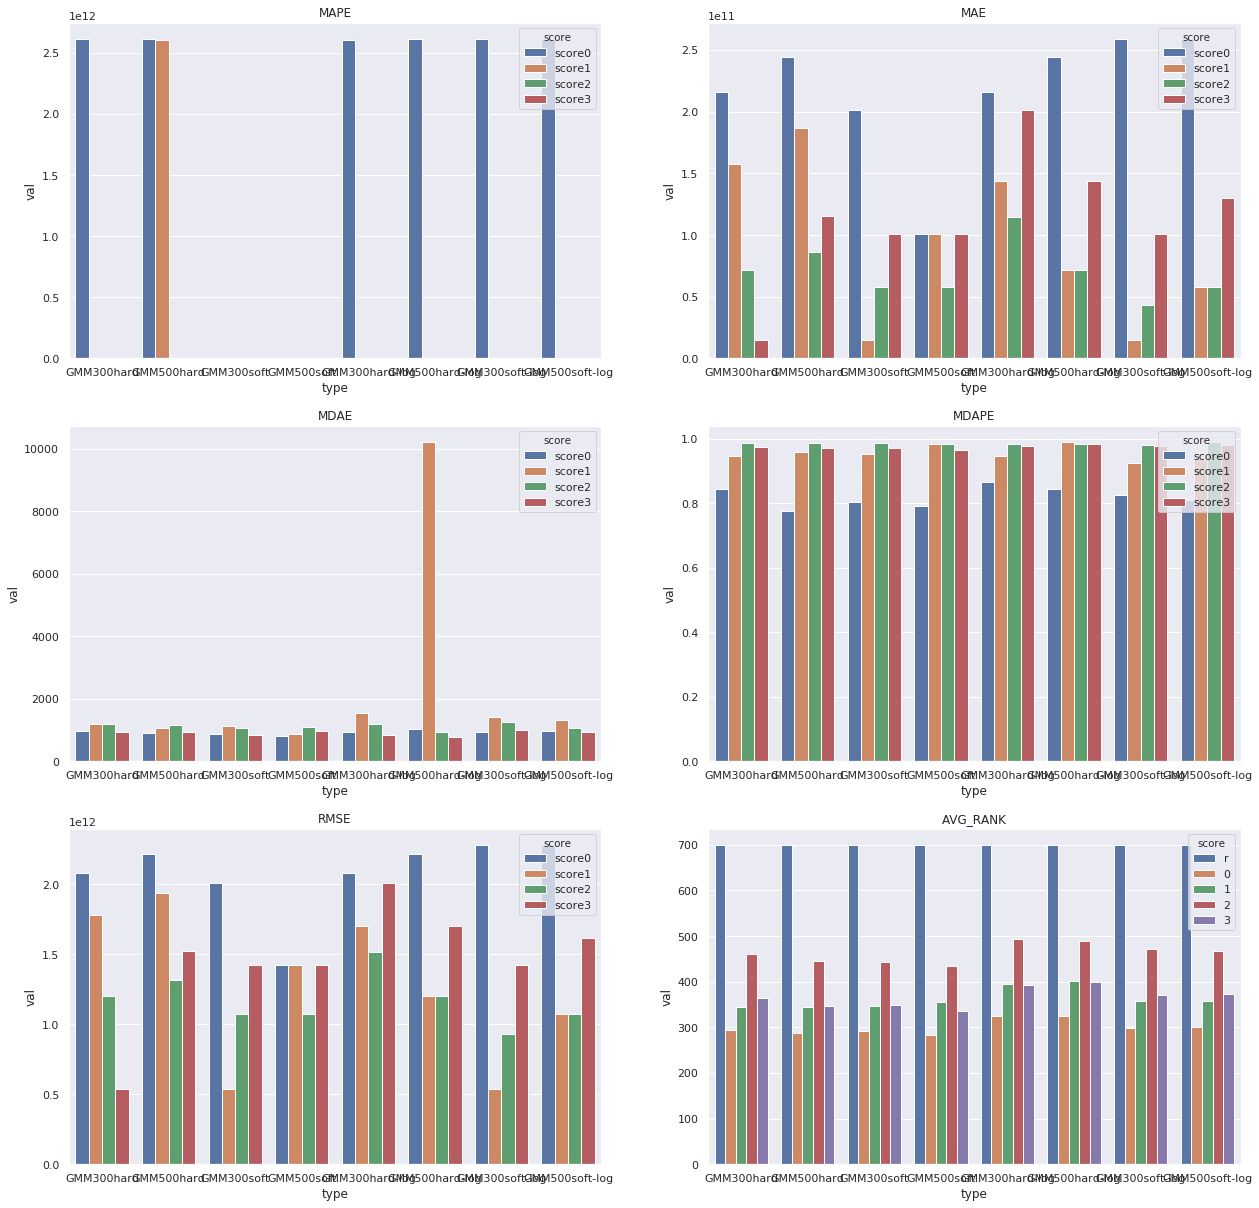

In [55]:
for gmm_name in gmms:

    idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B30W/gmms_log/gmm-{}-rd-soft/idx2vec_o_epoch1.dat'.format(gmm_name),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B30W/gmms_log/gmm-{}-rd-soft/idx2vec_i_epoch1.dat'.format(gmm_name),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/1B30W/gmms_log/gmm-{}-rd-soft/trained_gmms_epoch1_{}.dat'.format(gmm_name, gmm_name),'rb'))
    gmm = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/gmm_log/gmm-{}-rd-soft.dat'.format(gmm_name),'rb'))

    e1.load_GMM(idx2vec_i, idx2vec_o, trained_prototypes, gmm, log_space=True)
    res_gmm['GMM'+gmm_name+'soft-log'] = e1.eval_all()
    
e1.draw(res_gmm)

# Numeral Tokens

In [56]:
nc = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsTokenUnkNumeral30W/nc.dat','rb'))
idx2word = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsTokenUnkNumeral30W/idx2word.dat','rb'))
wc = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsTokenUnkNumeral30W/wc.dat','rb'))
word2idx = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsTokenUnkNumeral30W/word2idx.dat','rb'))

In [57]:
e2 = Evaluator(
    filtered_dataset,
    wc,
    nc,
    idx2word,
    word2idx
)

length of dataset: 1400 
dataset examples: 
 [('1.96', ['the', 'average', 'household', 'size', 'was', 'and', 'the', 'average', 'family', 'size']), ('1813.0', ['and', 'was', 'sold', 'there', 'in', 'dutch', 'career', 'and', 'capture', 'wilhelmina']), ('1111.0', ['of', 'blois', 'bishop', 'of', 'winchester', 'november', 'baldwin', 'iv', 'count', 'of']), ('1837.0', ['electromagnetic', 'telegraph', 'in', 'göttingen', 'may', 'samuel', 'morse', 'patents', 'the', 'telegraph']), ('20.1', ['made', 'up', 'of', 'individuals', 'and', 'were', 'someone', 'living', 'alone', 'who'])] 
numeral examples : [1.9600000e+00 1.8130000e+03 1.1110000e+03 1.8370000e+03 2.0100000e+01
 1.5600000e-02 2.5648400e+05 2.6600000e+00 4.9540000e+03 2.0080116e+07] 
 


In [58]:
idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B30W/token/idx2vec_o_epoch1.dat','rb'))
idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B30W/token/idx2vec_i_epoch1.dat','rb'))
e2.load_TOKEN(idx2vec_i, idx2vec_o)
res_toks = {}
res_token = e2.eval_all()
res_random = e2.eval_all(random=True)
res_toks['token'] = res_token
res_toks['random'] = res_random

oov: 256484.0
oov: 4954.0
oov: 20080116.0
oov: 18621.0
oov: 3760165.0
oov: 133605.0
oov: 16575.0
oov: 6275.0
oov: 51.22
oov: 0.9954
oov: 191163.0
oov: 217467.0
oov: 4667.0
oov: 42364.0
oov: 3804.0
oov: 843331.0
oov: 7103.0
oov: 266125.0
oov: 5609.0
oov: 32.78
oov: 48852.0
oov: 15462.0
oov: 51866.0
oov: 57.74
oov: 36915.0
oov: 21795.0
oov: 20.1616
oov: 210696.0
oov: 3689.0
oov: 35156.0
oov: 33284.0
oov: 2.005
oov: 7581.0
oov: 187057.0
oov: 64.85
oov: 12.029
oov: 1401876.0
oov: 36.01
oov: 59.71
oov: 8642.0
oov: 1.0026
oov: 6428.0
oov: 238391.0
oov: 95080.0
oov: 8289563.0
oov: 11130.0
oov: 19.18
oov: 163613.0
oov: 28155.0
oov: 85729.0
oov: 15238.0
oov: 46202.0
oov: 1159770.0
oov: 28311.0
oov: 20307.0
oov: 7511.0
oov: 35.46
oov: 904000.0
oov: 20090707175123.0
oov: 451.8
oov: 18649.0
oov: 18376806.0
oov: 65971.0
oov: 417473.0
oov: 5162.0
oov: 20130121085710.0
oov: 28744.0
oov: -1787.0
oov: 22407500.0
oov: 496761.0
oov: 746387.0
oov: 41219.0
oov: 30.36
oov: 8686.0
oov: 61143.0
oov: 127402.0


In [60]:
e1.flod_score(res_toks, 0)

,RMSE,avg_rank,mae,mape,mdae,mdape,topk,x
token,1.86019e+12,293.601,1.72236e+11,113143,1000.5,0.945398,"[0.34, 0.4442857142857143, 0.6164285714285714,...","[70, 140, 280, 420, 700, 979]"
random,2.84216e+12,293.601,3.44537e+11,5.46381e+10,3538.3,0.999901,"[0.34, 0.4442857142857143, 0.6164285714285714,...","[70, 140, 280, 420, 700, 979]"


# Fixed

In [61]:
nc = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/nc.dat','rb'))
idx2word = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/idx2word.dat','rb'))
wc = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/wc.dat','rb'))
word2idx = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/word2idx.dat','rb'))

In [62]:
e2 = Evaluator(
    filtered_dataset,
    wc,
    nc,
    idx2word,
    word2idx
)

length of dataset: 1400 
dataset examples: 
 [('1.96', ['the', 'average', 'household', 'size', 'was', 'and', 'the', 'average', 'family', 'size']), ('1813.0', ['and', 'was', 'sold', 'there', 'in', 'dutch', 'career', 'and', 'capture', 'wilhelmina']), ('1111.0', ['of', 'blois', 'bishop', 'of', 'winchester', 'november', 'baldwin', 'iv', 'count', 'of']), ('1837.0', ['electromagnetic', 'telegraph', 'in', 'göttingen', 'may', 'samuel', 'morse', 'patents', 'the', 'telegraph']), ('20.1', ['made', 'up', 'of', 'individuals', 'and', 'were', 'someone', 'living', 'alone', 'who'])] 
numeral examples : [1.9600000e+00 1.8130000e+03 1.1110000e+03 1.8370000e+03 2.0100000e+01
 1.5600000e-02 2.5648400e+05 2.6600000e+00 4.9540000e+03 2.0080116e+07] 
 


In [64]:
idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B30W/FIXED/idx2vec_o_epoch1.dat','rb'))
idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B30W/FIXED/idx2vec__epoch1.dat','rb'))
e2.load_fixed(idx2vec_i, idx2vec_o)

In [65]:
res_fixed_test = e2.eval_all(varbose=False)

In [66]:
res_fixed_test

{'x': [70, 140, 280, 420, 700, 979],
 'topk': array([[0.05      , 0.1       , 0.2       , 0.3       , 0.5       ,
         0.69928571],
        [0.04928571, 0.09928571, 0.19928571, 0.29928571, 0.49928571,
         0.69857143],
        [0.05857143, 0.11      , 0.21      , 0.31214286, 0.51142857,
         0.71142857],
        [0.06285714, 0.11571429, 0.21642857, 0.32214286, 0.52928571,
         0.72142857],
        [0.06      , 0.11214286, 0.21357143, 0.31785714, 0.51857143,
         0.71714286]]),
 'RMSE': array([1.93643309e+12, 2.46439413e+12, 6.11062133e+12, 3.13570940e+12]),
 'mape': array([5.55643046e+09, 1.39798600e+10, 8.42046288e+12, 1.42224134e+10]),
 'mae': array([1.86614335e+11, 3.02113953e+11, 1.85522381e+12, 4.88959447e+11]),
 'mdae': array([50353. , 50371.5, 50525. , 50375.5]),
 'mdape': array([41.46274873, 42.82300902, 61.59442012, 44.74017588]),
 'avg_rank': [700.5,
  701.4807142857143,
  685.5814285714285,
  672.4721428571429,
  679.5128571428571]}

# LSTMnew

In [71]:
nc = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeralLSTM30W/nc.dat','rb'))
idx2word = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeralLSTM30W/idx2word.dat','rb'))
wc = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeralLSTM30W/wc.dat','rb'))
word2idx = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeralLSTM30W/word2idx.dat','rb'))
e2 = Evaluator(
    filtered_dataset,
    wc,
    nc,
    idx2word,
    word2idx
)
idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B/1/LSTMnew/idx2vec_o_epoch1.dat','rb'))
idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B/1/LSTMnew/idx2vec_i_epoch1.dat','rb'))
LSTM_model_path = '../../data/wikipedia/save/1B/1/LSTMnew/sgns_epoch1.pt'
e2.load_LSTM(idx2vec_i, idx2vec_o, LSTM_model_path)
res_LSTMnew = e1.eval_all()
print(res_LSTMnew)

length of dataset: 1400 
dataset examples: 
 [('1.96', ['the', 'average', 'household', 'size', 'was', 'and', 'the', 'average', 'family', 'size']), ('1813.0', ['and', 'was', 'sold', 'there', 'in', 'dutch', 'career', 'and', 'capture', 'wilhelmina']), ('1111.0', ['of', 'blois', 'bishop', 'of', 'winchester', 'november', 'baldwin', 'iv', 'count', 'of']), ('1837.0', ['electromagnetic', 'telegraph', 'in', 'göttingen', 'may', 'samuel', 'morse', 'patents', 'the', 'telegraph']), ('20.1', ['made', 'up', 'of', 'individuals', 'and', 'were', 'someone', 'living', 'alone', 'who'])] 
numeral examples : [1.9600000e+00 1.8130000e+03 1.1110000e+03 1.8370000e+03 2.0100000e+01
 1.5600000e-02 2.5648400e+05 2.6600000e+00 4.9540000e+03 2.0080116e+07] 
 
{'x': [70, 140, 280, 420, 700, 979], 'topk': array([[0.05      , 0.1       , 0.2       , 0.3       , 0.5       ,
        0.69928571],
       [0.33214286, 0.47214286, 0.63142857, 0.74      , 0.85071429,
        0.93428571],
       [0.25714286, 0.37285714, 0.5492

In [72]:
merge_all = {}
for i in [res_toks, res_gmm, res_sz, res_sz_log]:
    for k, v in i.items():
        merge_all[k] = v
merge_all['LSTM'] = res_LSTM
merge_all['LSTM1'] = res_LSTMnew
merge_all['FIXED'] = res_fixed_test

In [84]:
e2.flod_score(merge_all,3)

,RMSE,avg_rank,mae,mape,mdae,mdape,topk,x
token,4.77859e+12,600.279,1.13521e+12,1.59395e+12,32772.5,19.0738,"[0.04642857142857143, 0.09357142857142857, 0.1...","[70, 140, 280, 420, 700, 979]"
random,2.40118e+12,600.279,4.16245e+11,6.95353e+11,2373.5,0.999758,"[0.04642857142857143, 0.09357142857142857, 0.1...","[70, 140, 280, 420, 700, 979]"
GMM300hard,5.36433e+11,365.118,1.47073e+10,2.04809e+08,939.5,0.974632,"[0.2307142857142857, 0.365, 0.5407142857142857...","[70, 140, 280, 420, 700, 979]"
GMM500hard,1.51987e+12,347.672,1.1521e+11,2.08926e+08,950,0.96979,"[0.25642857142857145, 0.38642857142857145, 0.5...","[70, 140, 280, 420, 700, 979]"
GMM300soft,1.42165e+12,348.455,1.00848e+11,2.08769e+08,843,0.970719,"[0.26, 0.39357142857142857, 0.5657142857142857...","[70, 140, 280, 420, 700, 979]"
GMM500soft,1.42033e+12,336.357,1.00626e+11,2.0888e+08,974.25,0.965493,"[0.2557142857142857, 0.3914285714285714, 0.585...","[70, 140, 280, 420, 700, 979]"
GMM300hard-log,2.00921e+12,393.86,2.01092e+11,2.08377e+08,853.95,0.977565,"[0.19642857142857142, 0.30214285714285716, 0.4...","[70, 140, 280, 420, 700, 979]"
GMM500hard-log,1.69934e+12,398.923,1.43952e+11,2.09249e+08,783.35,0.983261,"[0.16857142857142857, 0.3007142857142857, 0.46...","[70, 140, 280, 420, 700, 979]"
GMM300soft-log,1.42243e+12,371.9,1.00924e+11,2.08973e+08,1014.5,0.975879,"[0.22642857142857142, 0.34714285714285714, 0.5...","[70, 140, 280, 420, 700, 979]"
GMM500soft-log,1.61402e+12,372.701,1.29755e+11,2.09348e+08,935.595,0.979529,"[0.2257142857142857, 0.35, 0.5235714285714286,...","[70, 140, 280, 420, 700, 979]"


In [153]:
with open('./res/merge_all_test.v2.json','w') as f:
    f.write(str(merge_all))

In [154]:
from numpy import array
with open('./res/merge_all_val.v2.json','r') as f:
    merge_all_val_v2 = eval(f.read())
with open('./res/merge_all_test.v2.json','r') as f:
    merge_all_test_v2 = eval(f.read())

In [167]:
e2.flod_score(merge_all_val_v2, 3)

,RMSE,avg_rank,mae,mape,mdae,mdape,topk,x
token,48290.3,36.46,9256.61,46.4357,1145.29,0.956308,"[0.01, 0.03, 0.1, 0.13, 0.31, 0.66, 0.76, 0.87...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
random,79710.2,36.46,19410.4,981.902,990.715,0.972463,"[0.01, 0.03, 0.1, 0.13, 0.31, 0.66, 0.76, 0.87...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
GMM50,48245,31.08,9039.4,290.326,840,0.984509,"[0.04, 0.06, 0.2, 0.33, 0.49, 0.75, 0.81, 0.87...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
GMM100,48159.9,30.86,8902.14,276.772,673.5,0.872488,"[0.03, 0.08, 0.22, 0.33, 0.49, 0.77, 0.82, 0.8...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
GMM200,48202.3,32.13,9011.14,605.085,893.5,0.947013,"[0.03, 0.06, 0.2, 0.29, 0.53, 0.7, 0.77, 0.86,...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
GMM300,48229.6,30.18,8986.69,275.497,661,0.96627,"[0.04, 0.07, 0.23, 0.34, 0.55, 0.73, 0.81, 0.8...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
GMM500,48283,30.97,9139.17,37.9331,958.76,0.986924,"[0.01, 0.07, 0.21, 0.35, 0.52, 0.74, 0.79, 0.8...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
GMMFP50,48206.3,40.92,9004.65,274.718,777,0.919694,"[0.02, 0.05, 0.2, 0.29, 0.39, 0.53, 0.6, 0.73,...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
GMMFP100,48162.5,30.59,8915.68,275.039,680,0.962672,"[0.01, 0.04, 0.23, 0.35, 0.53, 0.75, 0.81, 0.8...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"
GMMFP200,48284.5,32.1,9196.63,280.324,997.97,0.990463,"[0.02, 0.08, 0.22, 0.35, 0.51, 0.72, 0.76, 0.8...","[1, 3, 10, 15, 25, 40, 50, 60, 80, 100]"


In [166]:
e2.flod_score(merge_all_test_v2, 3)

,RMSE,avg_rank,mae,mape,mdae,mdape,topk,x
token,7.35219e+07,140.74,1.17127e+07,1.31652e+06,30158.5,17.5512,"[0.0025, 0.0275, 0.0425, 0.0675, 0.0975, 0.412...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
random,4.90142e+07,140.74,1.31769e+06,2276.41,1211,0.988396,"[0.0025, 0.0275, 0.0425, 0.0675, 0.0975, 0.412...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMM50,2.45096e+07,125.845,1.29285e+06,161.301,612.5,0.975804,"[0.025, 0.07, 0.0975, 0.1425, 0.215, 0.48, 0.6...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMM100,2.45097e+07,126.68,1.29285e+06,293.616,741.25,0.973087,"[0.015, 0.075, 0.1075, 0.16, 0.24, 0.495, 0.65...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMM200,2.45096e+07,119.73,1.29292e+06,228.115,832,0.983673,"[0.0225, 0.09, 0.125, 0.1775, 0.2675, 0.4975, ...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMM300,2.45096e+07,123.543,1.29279e+06,236.5,423,0.905867,"[0.0275, 0.0925, 0.1175, 0.1725, 0.2375, 0.507...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMM500,2.45096e+07,122.257,1.29285e+06,251.884,609.5,0.982057,"[0.0375, 0.1, 0.1225, 0.175, 0.26, 0.5225, 0.6...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMMFP50,2.45096e+07,165.107,1.29285e+06,250.824,813.5,0.948617,"[0.015, 0.0525, 0.0725, 0.1175, 0.18, 0.365, 0...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMMFP100,2.45096e+07,123.805,1.29386e+06,779.834,858.9,0.970833,"[0.0225, 0.06, 0.095, 0.1575, 0.235, 0.52, 0.6...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
GMMFP200,2.45097e+07,125.297,1.29602e+06,1029.75,778.5,0.984216,"[0.03, 0.095, 0.1275, 0.1825, 0.2525, 0.4975, ...","[3, 10, 15, 25, 40, 100, 150, 200, 250, 320]"
